# Importing packages and sorting data

In [46]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("output.csv", sep=",")

#one hot encoding marital status
df = pd.get_dummies(df, columns=['Marital_Status'])

#dropping the ID and the date of customer's enrollment with the company
df = df.drop(columns = ['ID','Dt_Customer']) 

print(df)

      Year_Birth  Education   Income  Kidhome  Teenhome  Recency  MntWines  \
0           1957          1  58138.0        0         0       58       635   
1           1954          1  46344.0        1         1       38        11   
2           1965          1  71613.0        0         0       26       426   
3           1984          1  26646.0        1         0       26        11   
4           1981          3  58293.0        1         0       94       173   
...          ...        ...      ...      ...       ...      ...       ...   
2214        1967          1  61223.0        0         1       46       709   
2215        1946          3  64014.0        2         1       56       406   
2216        1981          1  56981.0        0         0       91       908   
2217        1956          2  69245.0        0         1        8       428   
2218        1954          3  52869.0        1         1       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  ...  Childho

# Clustering

In [47]:
# Select all columns in sorted df for clustering
all_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Standardizing all features
scaler = StandardScaler()
scaled_all_features = scaler.fit_transform(df[all_features])

# Apply K-Means clustering on all features
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_all_features)

# Assign cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

/Users/nanamiiga/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
# Summary of the cluster of all features
cluster_summary = df.groupby('cluster')[all_features].mean()
print(cluster_summary)

          Year_Birth  Education        Income   Kidhome  Teenhome    Recency  \
cluster                                                                        
0        1971.852349   1.589645  34953.552576  0.812081  0.458293  49.506232   
1        1964.368499   1.768202  59534.958440  0.196137  0.924220  48.219911   
2        1968.660040   1.671968  76914.040923  0.021869  0.051690  49.940358   

           MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
cluster                                                           ...   
0         43.754554   4.996165        24.321189         7.038351  ...   
1        467.659733  30.404160       152.148588        40.545319  ...   
2        632.087475  65.294235       470.137177        97.071571  ...   

         Childhome  FamilyMembers  AverageIncome        Age  NumTotalPurchase  \
cluster                                                                         
0         1.270374       2.922339   20023.533545  41.253116          5.

# Income and Product

In [48]:
#Clustering Continuous Data
#Selecting relevant features
features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Summary of the clusters based on selected features
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)

               Income    MntWines  MntFruits  MntMeatProducts  \
cluster                                                         
0        34953.552576   43.754554   4.996165        24.321189   
1        59534.958440  467.659733  30.404160       152.148588   
2        76914.040923  632.087475  65.294235       470.137177   

         MntFishProducts  MntSweetProducts  MntGoldProds  
cluster                                                   
0               7.038351          5.023969     15.930010  
1              40.545319         30.426449     63.057949  
2              97.071571         68.009940     74.610338  


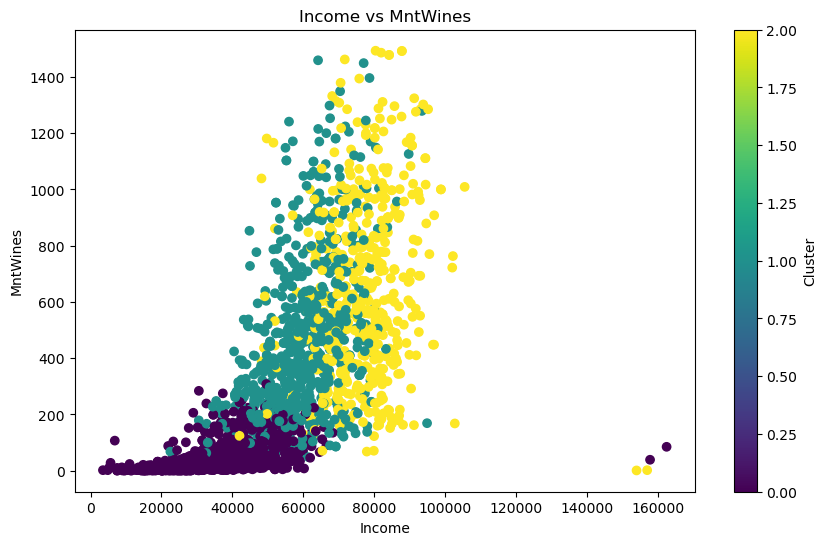

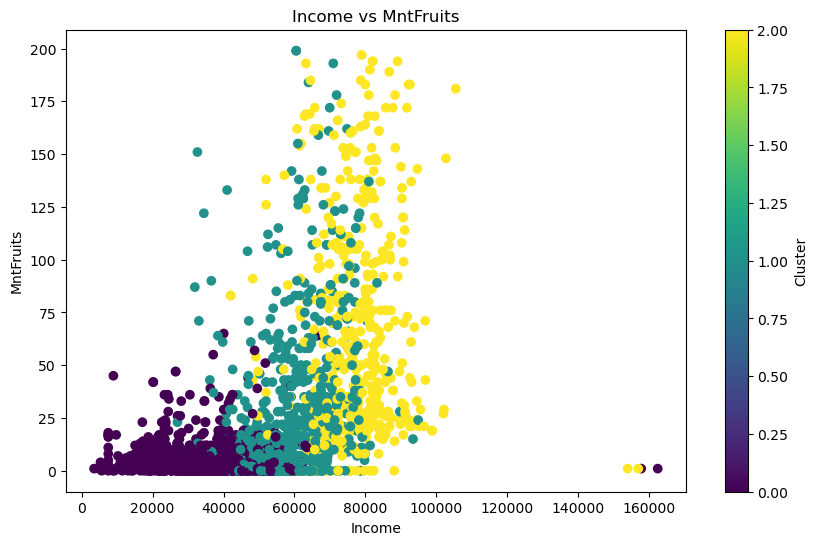

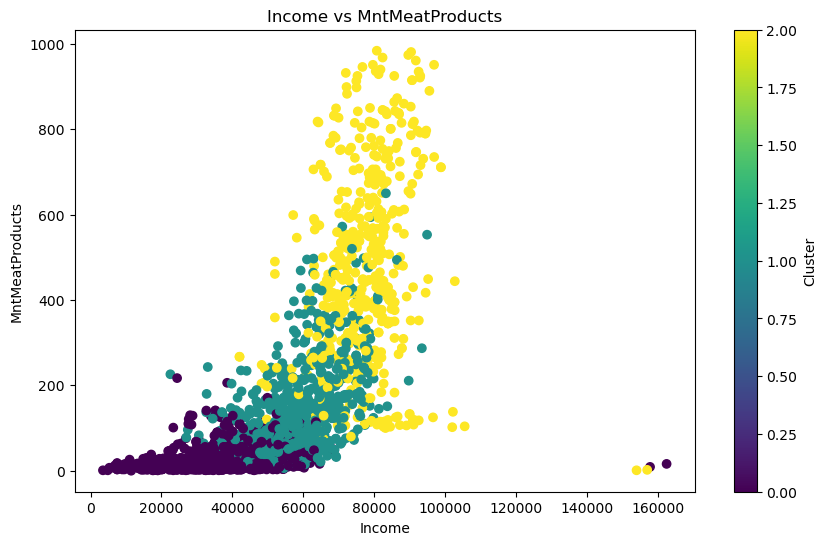

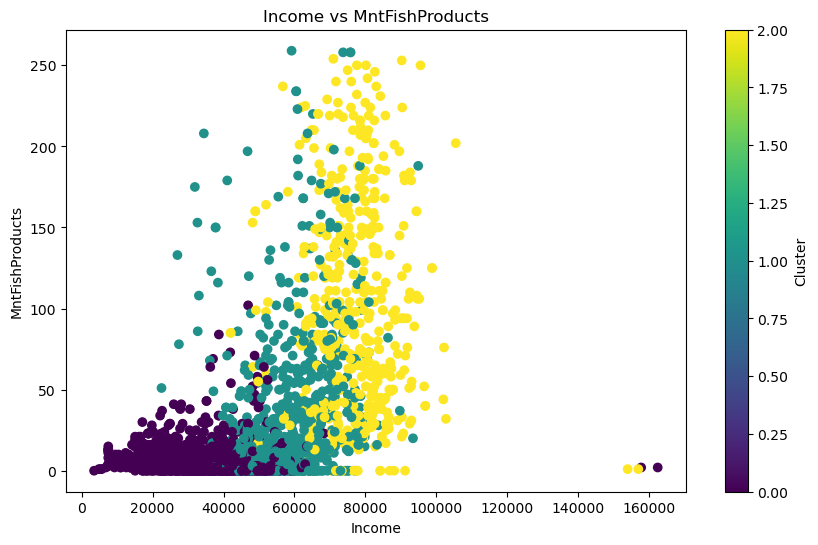

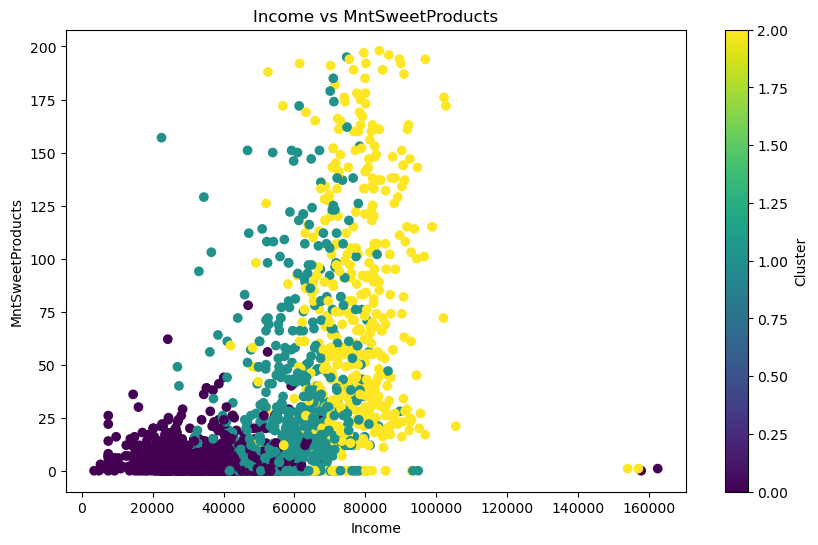

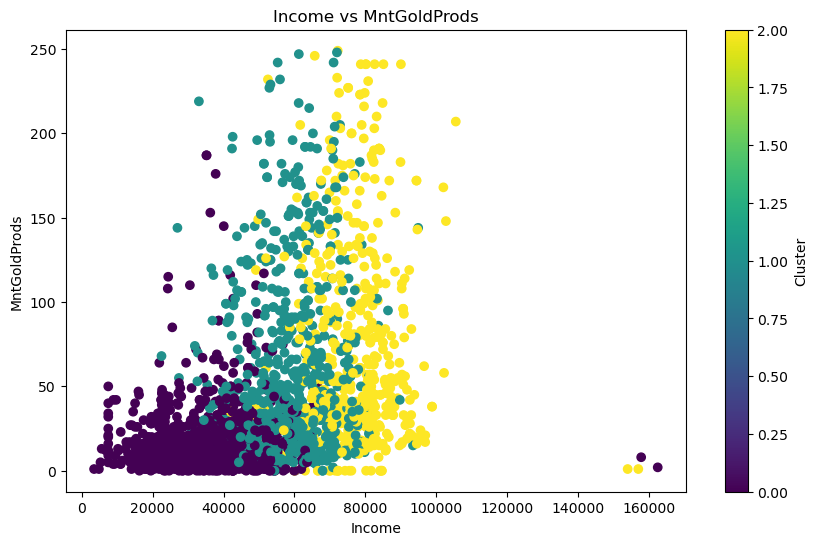

In [49]:
# Plotting based on selected features
for feature in features[1:]:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Income'], df[feature], c=df['cluster'], cmap='viridis')
    plt.xlabel('Income')
    plt.ylabel(feature)
    plt.title(f'Income vs {feature}')
    plt.colorbar(label='Cluster')
    plt.show()

# Income and places of purchaces 

In [54]:
#Discrete Data
#Selecting relevant features
features = ['Income', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

# Summary of the clusters based on selected features
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)

               Income  NumWebPurchases  NumCatalogPurchases  \
cluster                                                       
0        34953.552576         2.183126             0.564717   
1        59534.958440         6.331352             3.341753   
2        76914.040923         4.926441             5.948310   

         NumStorePurchases  NumWebVisitsMonth  
cluster                                        
0                 3.232982           6.479386  
1                 7.989599           5.506686  
2                 8.312127           2.644135  


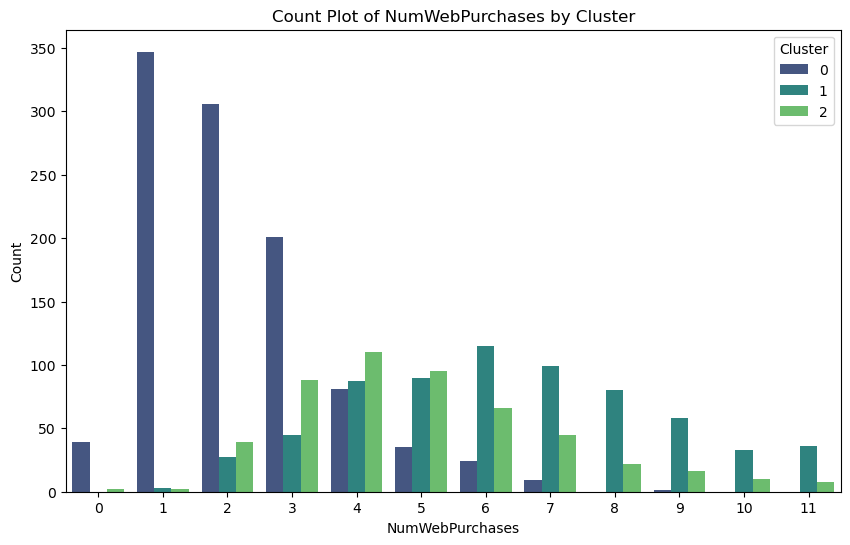

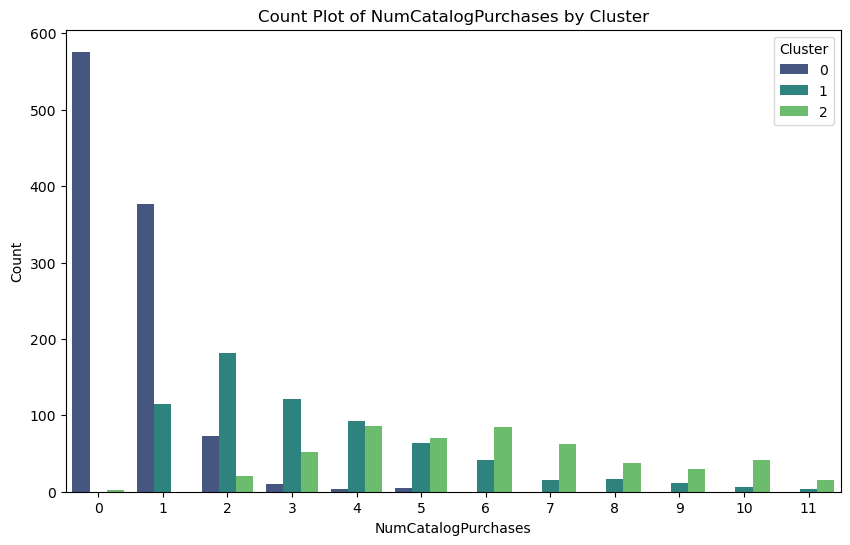

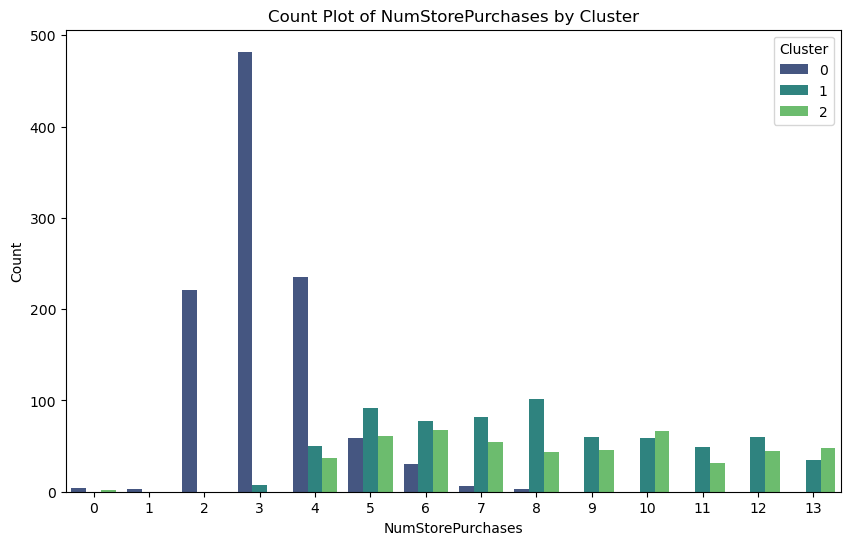

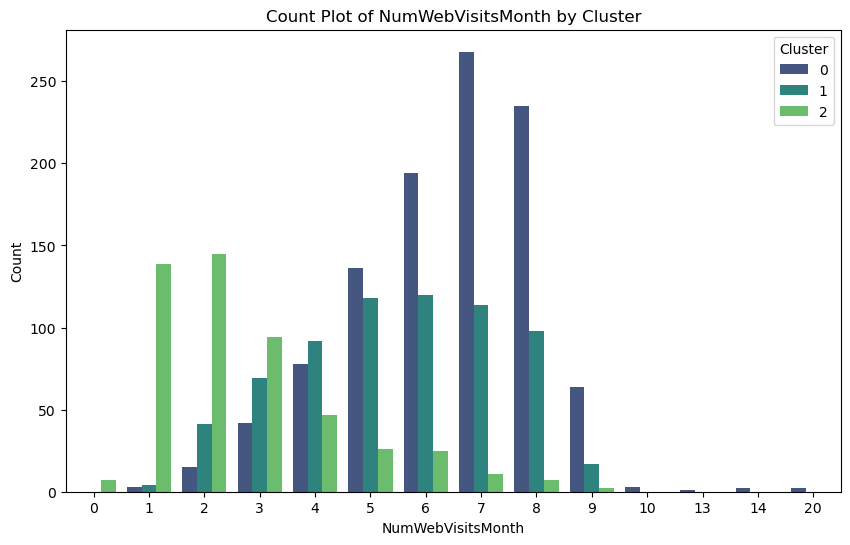

In [55]:
# Bar chart based on selected features
for feature in features[1:]:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='cluster', data=df, palette='viridis')

    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {feature} by Cluster')
    plt.legend(title='Cluster')
    plt.show()

# Income and Promotion

In [56]:
#Binary Data
#Select the feature columns for clustering
features =['Income','NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
             
# Summary of the clusters based on selected features
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)

               Income  NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  \
cluster                                                                
0        34953.552576           2.111218      0.000959      0.001918   
1        59534.958440           3.526003      0.034175      0.011887   
2        76914.040923           1.037773      0.236581      0.039761   

         AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  
cluster                                                      
0            0.073826      0.008629      0.000000  0.096836  
1            0.060921      0.127786      0.016345  0.099554  
2            0.089463      0.141153      0.298211  0.326044  


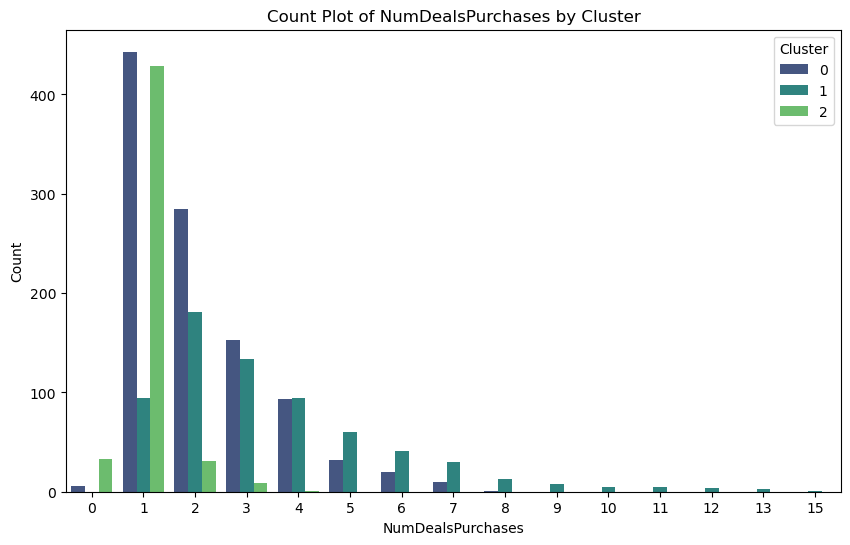

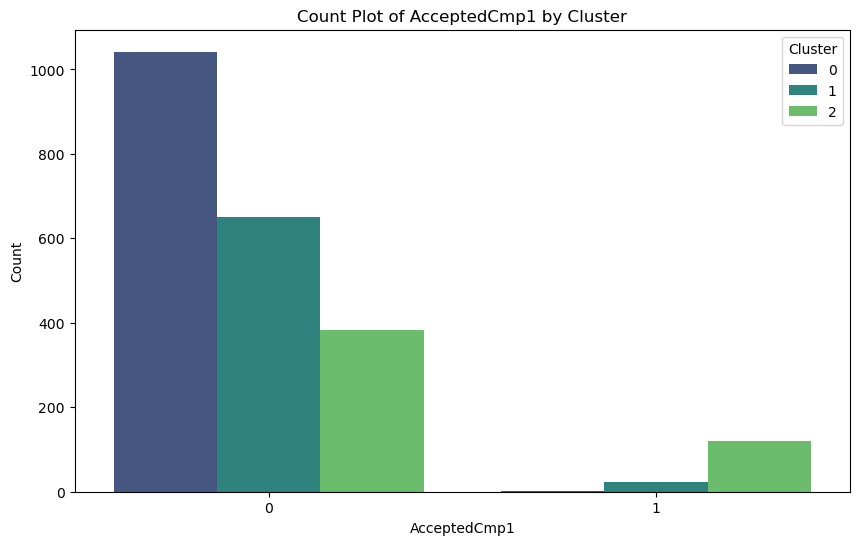

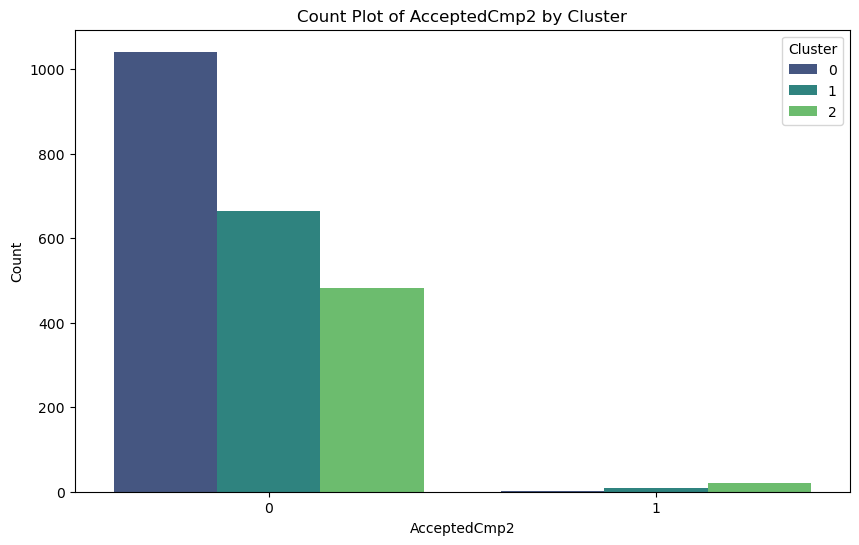

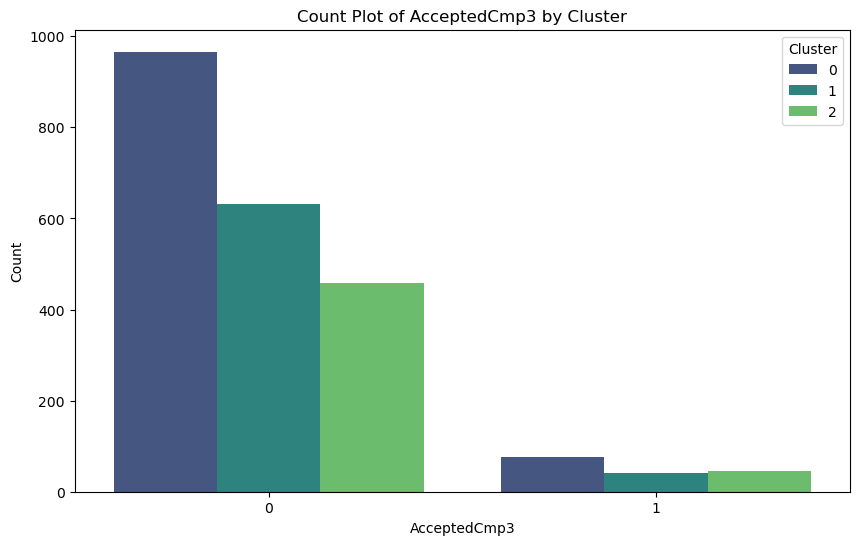

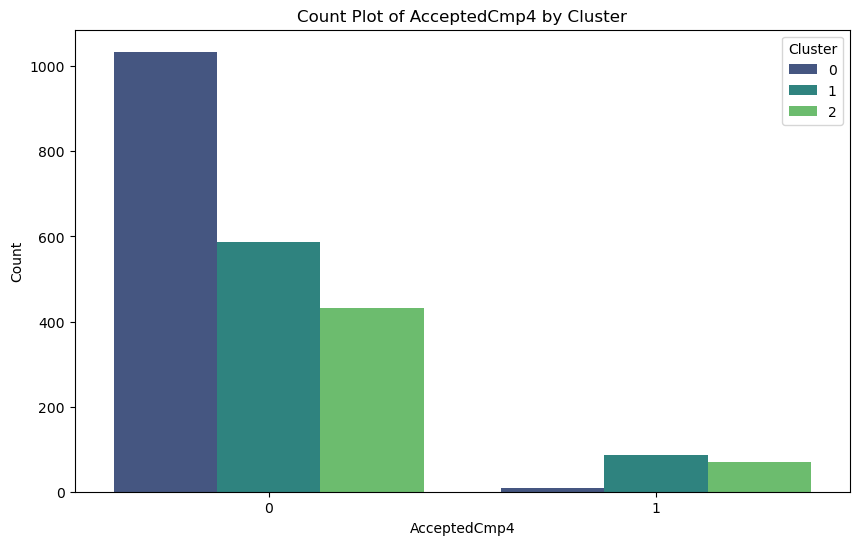

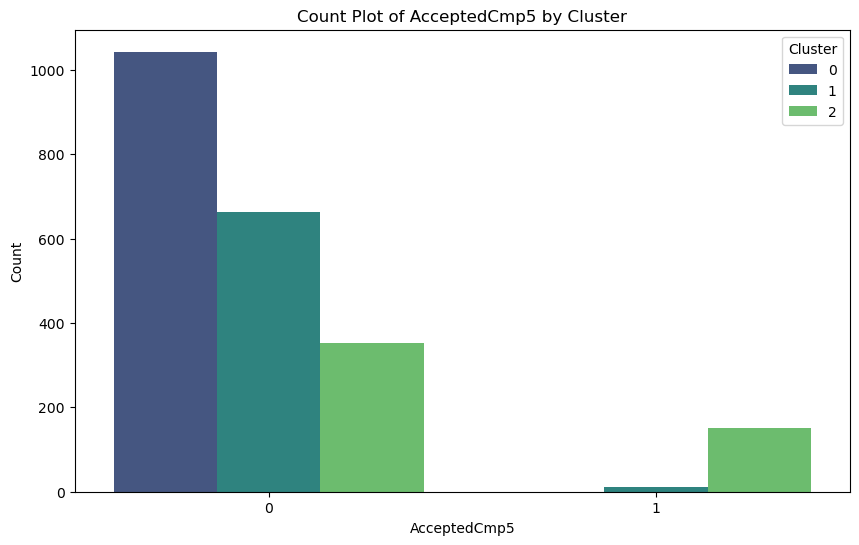

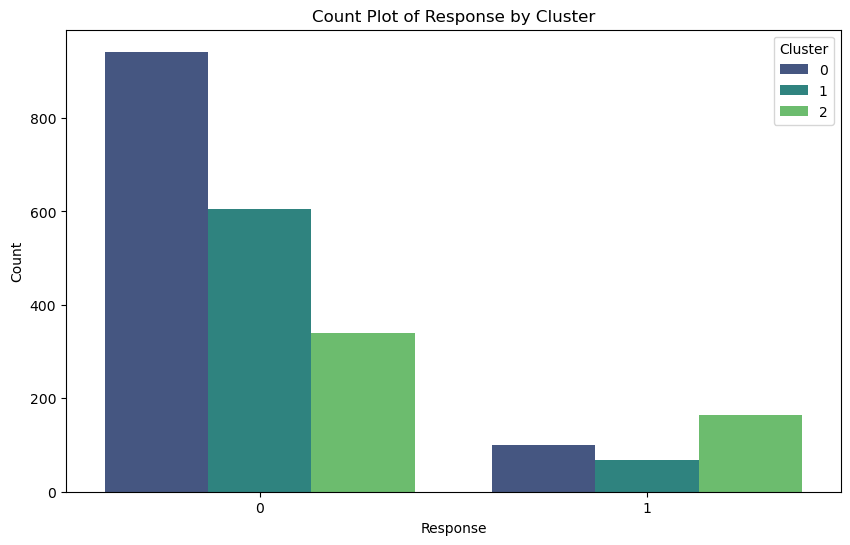

In [57]:
# Bar chart based on selected features
for feature in features[1:]:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='cluster', data=df, palette='viridis')

    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {feature} by Cluster')
    plt.legend(title='Cluster')
    plt.show()